<a href="https://colab.research.google.com/github/shintaaulia/Saham/blob/main/01_Neural_Network_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librarry

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import mean_squared_error
import math
plt.style.use('fivethirtyeight')

# Import Dataset

## ADRO

In [ ]:
df_ADRO=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/ADRO.JK.csv')
df_ADRO

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,1200.0,1245.0,1180.0,1225.0,1116.103271,66293300
1,2020-02-04,1260.0,1285.0,1235.0,1270.0,1157.102905,65979400
2,2020-02-05,1295.0,1345.0,1295.0,1315.0,1198.102661,60602000
3,2020-02-06,1350.0,1350.0,1280.0,1305.0,1188.991577,37379900
4,2020-02-07,1285.0,1315.0,1285.0,1305.0,1188.991577,15026100
...,...,...,...,...,...,...,...
116,2020-07-24,1130.0,1135.0,1085.0,1090.0,1032.203857,57475100
117,2020-07-27,1090.0,1110.0,1080.0,1110.0,1051.143311,26677900
118,2020-07-28,1115.0,1125.0,1075.0,1090.0,1032.203857,85970300
119,2020-07-29,1085.0,1095.0,1070.0,1085.0,1027.468994,32109100


## ANTM


In [ ]:
df_ANTM=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/ANTM.JK.csv')
df_ANTM

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,725.0,730.0,705.0,715.0,706.559326,45970300
1,2020-02-04,725.0,735.0,715.0,730.0,721.382263,49024800
2,2020-02-05,730.0,735.0,715.0,725.0,716.441345,28225000
3,2020-02-06,730.0,735.0,715.0,735.0,726.323242,28180200
4,2020-02-07,730.0,740.0,720.0,730.0,721.382263,27156200
...,...,...,...,...,...,...,...
116,2020-07-24,705.0,705.0,685.0,685.0,680.057373,134255200
117,2020-07-27,695.0,725.0,690.0,725.0,719.768738,197203700
118,2020-07-28,730.0,755.0,715.0,720.0,714.804810,186698000
119,2020-07-29,720.0,740.0,710.0,730.0,724.732666,79691500


## BRPT

In [ ]:
df_BRPT=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/BRPT.JK.csv')
df_BRPT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,1300.0,1300.0,1260.0,1275.0,1271.052734,36542200
1,2020-02-04,1280.0,1285.0,1260.0,1270.0,1266.068115,46617600
2,2020-02-05,1280.0,1280.0,1225.0,1280.0,1276.037231,54192400
3,2020-02-06,1280.0,1280.0,1240.0,1240.0,1236.161011,40622600
4,2020-02-07,1240.0,1270.0,1235.0,1265.0,1261.083618,58846600
...,...,...,...,...,...,...,...
116,2020-07-24,1190.0,1190.0,1165.0,1175.0,1171.362305,27929400
117,2020-07-27,1150.0,1150.0,1095.0,1095.0,1091.609985,84700300
118,2020-07-28,1085.0,1085.0,1020.0,1020.0,1016.842163,32173500
119,2020-07-29,1010.0,1030.0,950.0,950.0,947.058899,57125700


## INCO

In [ ]:
df_INCO=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/INCO.JK.csv')
df_INCO

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,3160.0,3250.0,3090.0,3250.0,3219.857910,8700000
1,2020-02-04,3250.0,3330.0,3240.0,3300.0,3269.394287,11726300
2,2020-02-05,3300.0,3310.0,3250.0,3300.0,3269.394287,4691800
3,2020-02-06,3350.0,3350.0,3280.0,3310.0,3279.301514,4690400
4,2020-02-07,3310.0,3320.0,3280.0,3310.0,3279.301514,4336400
...,...,...,...,...,...,...,...
116,2020-07-24,3300.0,3410.0,3270.0,3280.0,3249.579590,42603800
117,2020-07-27,3320.0,3490.0,3310.0,3470.0,3437.817627,29558200
118,2020-07-28,3500.0,3590.0,3380.0,3430.0,3398.188477,29028200
119,2020-07-29,3420.0,3460.0,3360.0,3400.0,3368.466797,17851000


## ITMG

In [ ]:
df_ITMG=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/ITMG.JK.csv')
df_ITMG

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,10050.0,10400.0,9800.0,10050.0,8456.703125,3045400
1,2020-02-04,10100.0,10350.0,10075.0,10150.0,8540.850586,1370400
2,2020-02-05,10375.0,10550.0,10375.0,10450.0,8793.288086,2809900
3,2020-02-06,10750.0,10775.0,10475.0,10525.0,8856.398438,1858900
4,2020-02-07,10525.0,10550.0,10325.0,10425.0,8772.251953,1145100
...,...,...,...,...,...,...,...
116,2020-07-24,7900.0,7900.0,7650.0,7675.0,6898.826172,3677500
117,2020-07-27,7700.0,8000.0,7675.0,8000.0,7190.958496,6373500
118,2020-07-28,8050.0,8350.0,8025.0,8050.0,7235.902344,6011200
119,2020-07-29,8125.0,8125.0,7825.0,7900.0,7101.071777,2774000


## PGAS

In [ ]:
df_PGAS=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/PGAS.JK.csv')
df_PGAS

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,1680.0,1725.0,1675.0,1700.0,1540.007568,38058200
1,2020-02-04,1700.0,1710.0,1520.0,1520.0,1376.947876,166404400
2,2020-02-05,1530.0,1585.0,1445.0,1475.0,1336.182983,209517700
3,2020-02-06,1500.0,1540.0,1480.0,1520.0,1376.947876,119388900
4,2020-02-07,1520.0,1555.0,1500.0,1540.0,1395.065552,110802500
...,...,...,...,...,...,...,...
116,2020-07-24,1250.0,1260.0,1210.0,1220.0,1220.000000,110530200
117,2020-07-27,1210.0,1250.0,1210.0,1230.0,1230.000000,67576100
118,2020-07-28,1235.0,1245.0,1210.0,1220.0,1220.000000,56839200
119,2020-07-29,1220.0,1250.0,1205.0,1230.0,1230.000000,100171500


## PTBA

In [ ]:
df_PTBA=pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/PTBA.JK.csv')
df_PTBA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,2180.0,2220.0,2160.0,2170.0,1823.736572,35172600
1,2020-02-04,2190.0,2240.0,2170.0,2230.0,1874.162476,21085800
2,2020-02-05,2280.0,2340.0,2280.0,2320.0,1949.801392,32483400
3,2020-02-06,2360.0,2360.0,2280.0,2290.0,1924.588379,15297600
4,2020-02-07,2270.0,2340.0,2260.0,2320.0,1949.801392,11738300
...,...,...,...,...,...,...,...
116,2020-07-24,2100.0,2120.0,2070.0,2070.0,2007.147461,31699900
117,2020-07-27,2080.0,2110.0,2070.0,2080.0,2016.843750,23222200
118,2020-07-28,2090.0,2110.0,2050.0,2080.0,2016.843750,30856500
119,2020-07-29,2080.0,2090.0,2050.0,2070.0,2007.147461,14713800


## LQ45

In [ ]:
df_LQ45 = pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Paper/main/%5EJKLQ45.csv')
df_LQ45

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,956.390015,965.260010,950.169983,953.260010,953.260010,1092300000
1,2020-02-04,970.630005,970.630005,961.280029,964.840027,964.840027,1344800000
2,2020-02-05,972.640015,976.559998,964.479980,976.559998,976.559998,1167000000
3,2020-02-06,983.330017,984.609985,973.200012,975.710022,975.710022,1053900000
4,2020-02-07,976.570007,979.450012,974.590027,977.000000,977.000000,1069000000
...,...,...,...,...,...,...,...
116,2020-07-24,806.549988,807.030029,791.140015,791.140015,791.140015,1870600000
117,2020-07-27,791.140015,800.359985,790.440002,800.359985,800.359985,1663000000
118,2020-07-28,800.359985,807.090027,796.700012,799.679993,799.679993,1642600000
119,2020-07-29,799.679993,800.380005,793.460022,795.380005,795.380005,1809400000


# Plot

Melakukan Visualisasi `60 Hari Terakhir` dari `dataframe`

## ADRO

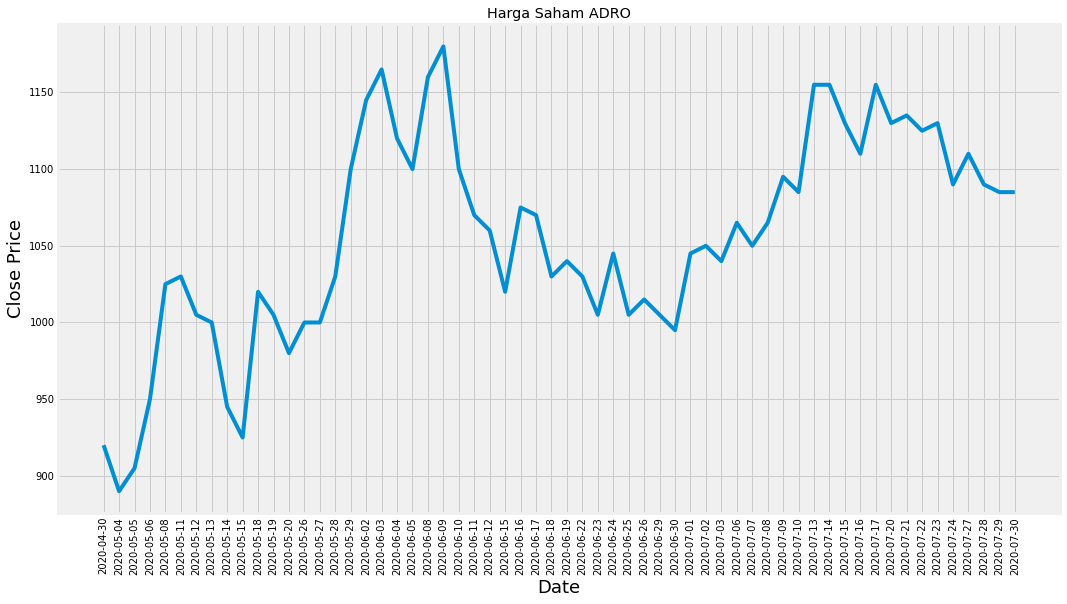

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham ADRO')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_ADRO['Close'][len(df_ADRO['Close'])-60:len(df_ADRO['Close'])])
plt.xticks(np.arange(len(df_ADRO['Close'])-60,len(df_ADRO['Close'])),df_ADRO['Date'][len(df_ADRO['Close'])-60:len(df_ADRO['Close'])],rotation = 90)
plt.show()

## ANTM

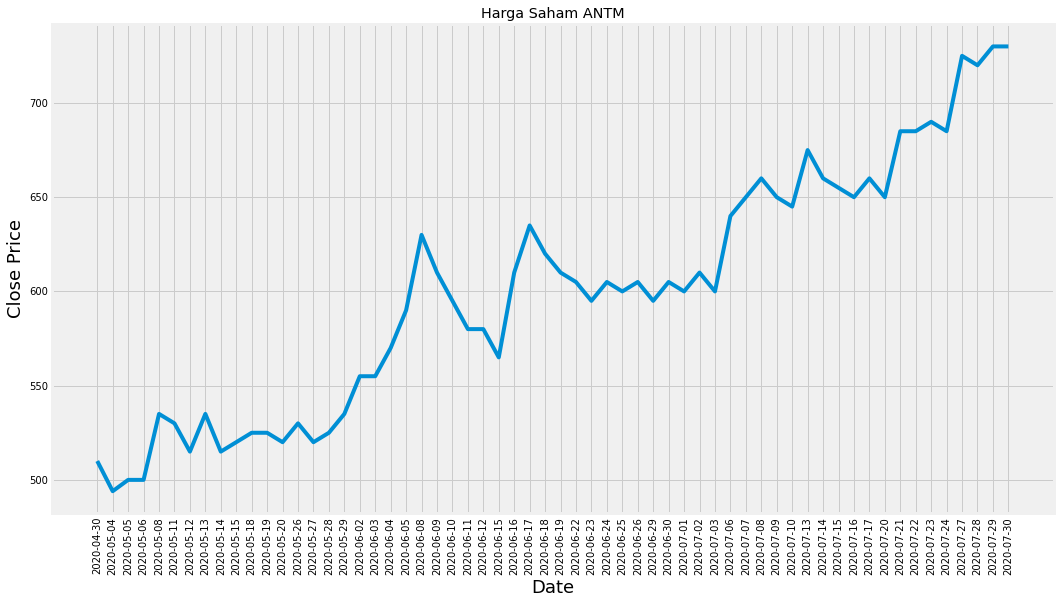

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham ANTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_ANTM['Close'][len(df_ANTM['Close'])-60:len(df_ANTM['Close'])])
plt.xticks(np.arange(len(df_ANTM['Close'])-60,len(df_ANTM['Close'])),df_ANTM['Date'][len(df_ANTM['Close'])-60:len(df_ANTM['Close'])],rotation = 90)
plt.show()

## BRPT

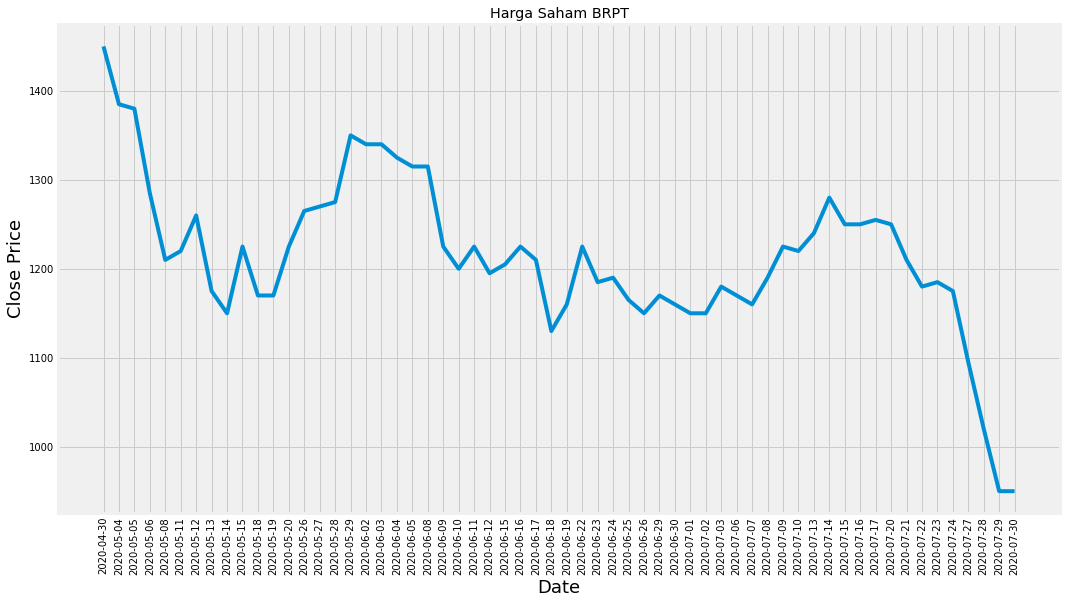

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham BRPT')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_BRPT['Close'][len(df_BRPT['Close'])-60:len(df_BRPT['Close'])])
plt.xticks(np.arange(len(df_BRPT['Close'])-60,len(df_BRPT['Close'])),df_BRPT['Date'][len(df_BRPT['Close'])-60:len(df_BRPT['Close'])],rotation = 90)
plt.show()

## INCO

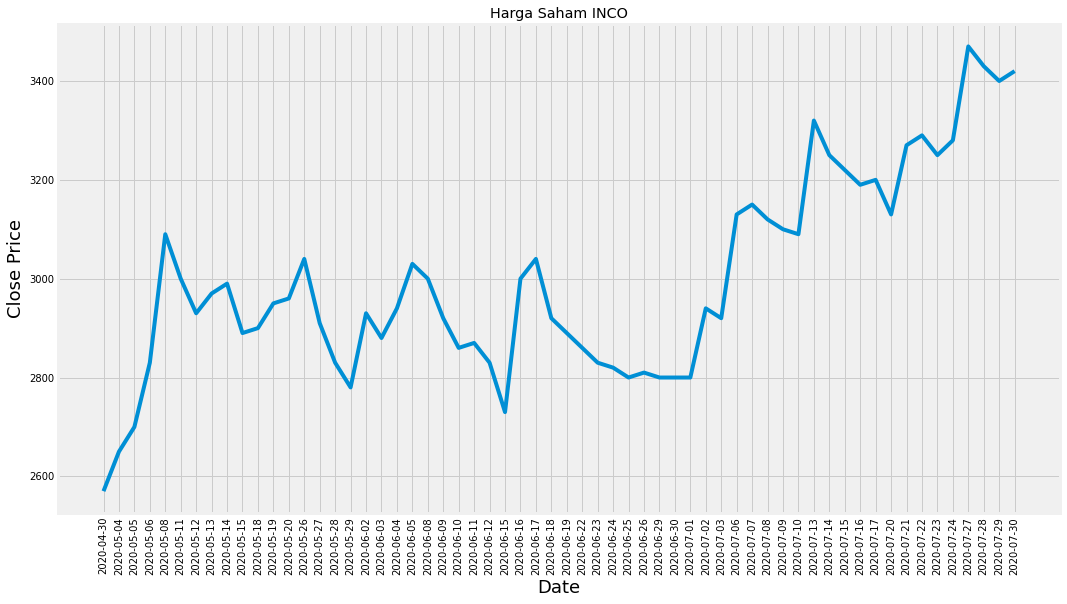

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham INCO')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_INCO['Close'][len(df_INCO['Close'])-60:len(df_INCO['Close'])])
plt.xticks(np.arange(len(df_INCO['Close'])-60,len(df_INCO['Close'])),df_INCO['Date'][len(df_INCO['Close'])-60:len(df_INCO['Close'])],rotation = 90)
plt.show()

## ITMG

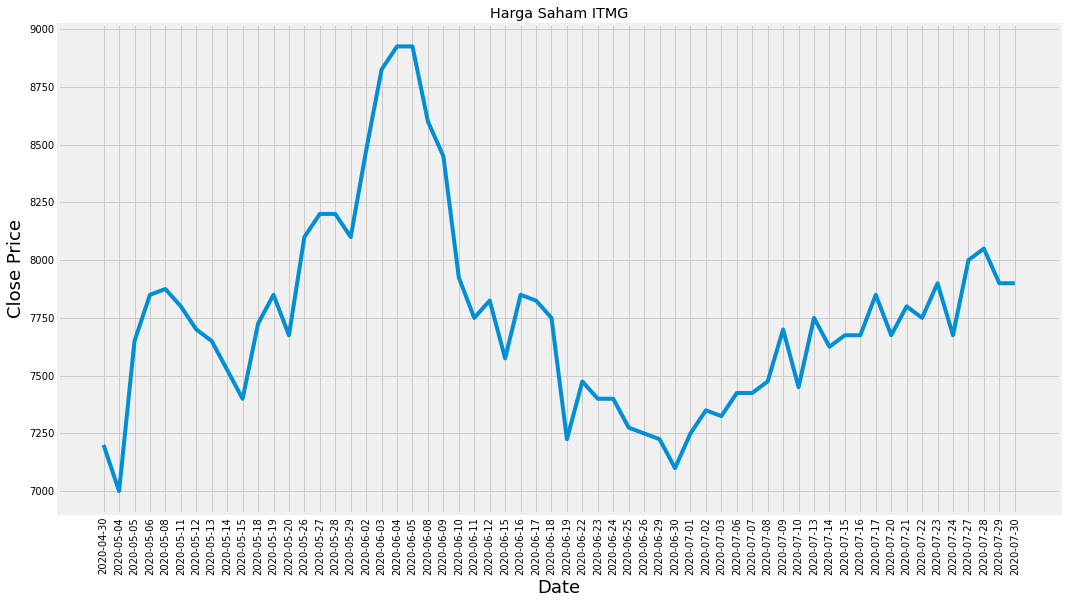

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham ITMG')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_ITMG['Close'][len(df_ITMG['Close'])-60:len(df_ITMG['Close'])])
plt.xticks(np.arange(len(df_ITMG['Close'])-60,len(df_ITMG['Close'])),df_ITMG['Date'][len(df_ITMG['Close'])-60:len(df_ITMG['Close'])],rotation = 90)
plt.show()

## PGAS

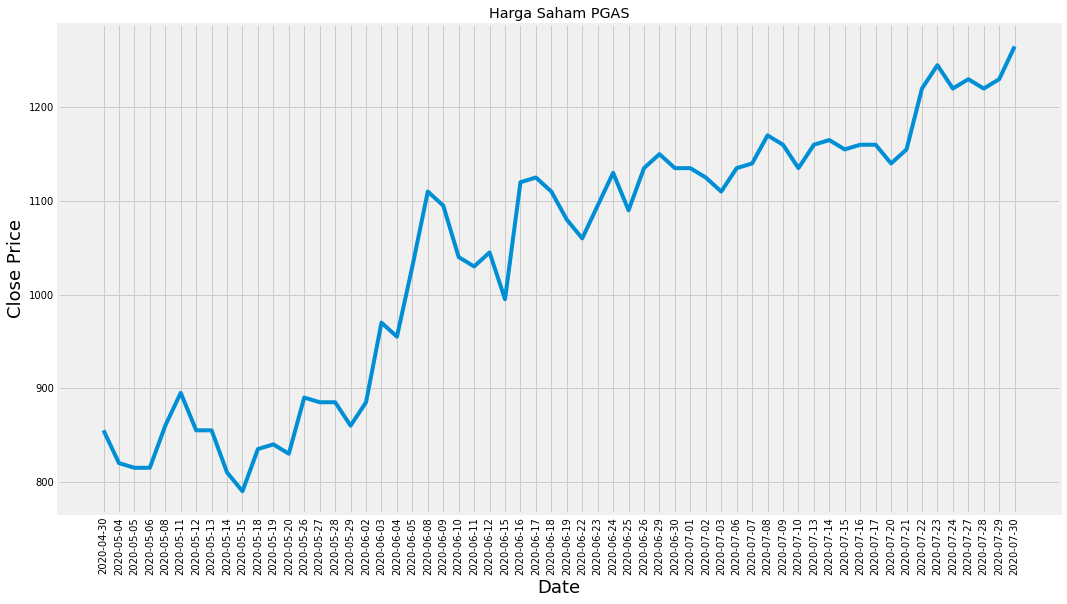

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham PGAS')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_PGAS['Close'][len(df_PGAS['Close'])-60:len(df_PGAS['Close'])])
plt.xticks(np.arange(len(df_PGAS['Close'])-60,len(df_PGAS['Close'])),df_PGAS['Date'][len(df_PGAS['Close'])-60:len(df_PGAS['Close'])],rotation = 90)
plt.show()

## PTBA

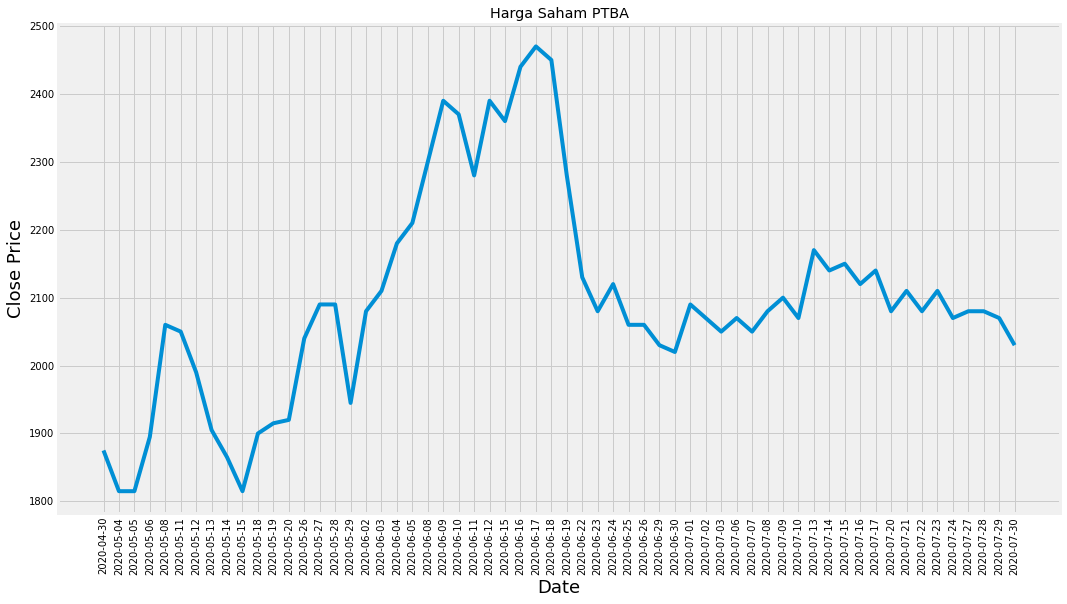

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham PTBA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_PTBA['Close'][len(df_PTBA['Close'])-60:len(df_PTBA['Close'])])
plt.xticks(np.arange(len(df_PTBA['Close'])-60,len(df_PTBA['Close'])),df_PTBA['Date'][len(df_PTBA['Close'])-60:len(df_PTBA['Close'])],rotation = 90)
plt.show()

## LQ45

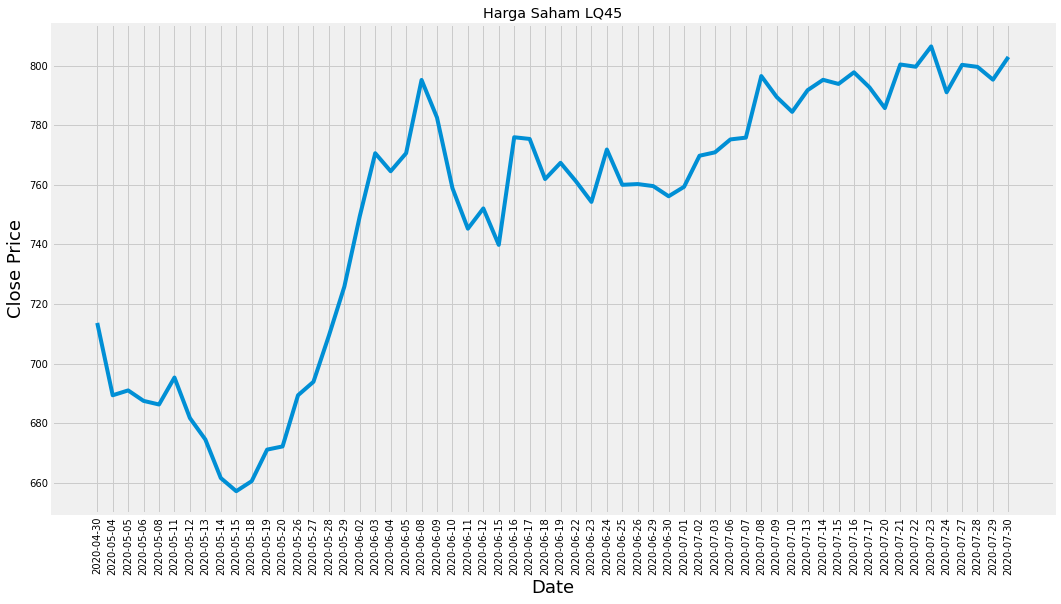

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Harga Saham LQ45')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_LQ45['Close'][len(df_LQ45['Close'])-60:len(df_LQ45['Close'])])
plt.xticks(np.arange(len(df_LQ45['Close'])-60,len(df_LQ45['Close'])),df_LQ45['Date'][len(df_LQ45['Close'])-60:len(df_LQ45['Close'])],rotation = 90)
plt.show()

# Machine Learning Process 

## Multi Layer Perceptron 

### ADRO

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_ADRO.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_ADRO = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_ADRO

,Open,High,Low,Close,Adj Close,Volume
0,0.787234,0.833333,0.808511,0.822695,0.822695,0.389378
1,0.872340,0.891304,0.886525,0.886525,0.886525,0.387534
2,0.921986,0.978261,0.971631,0.950355,0.950355,0.355949
3,1.000000,0.985507,0.950355,0.936170,0.936170,0.219553
4,0.907801,0.934783,0.957447,0.936170,0.936170,0.088257
...,...,...,...,...,...,...
116,0.687943,0.673913,0.673759,0.631206,0.692078,0.337583
117,0.631206,0.637681,0.666667,0.659574,0.721563,0.156694
118,0.666667,0.659420,0.659574,0.631206,0.692078,0.504952
119,0.624113,0.615942,0.652482,0.624113,0.684706,0.188595


In [ ]:
X=df_ADRO[['Open','High','Low']].values
y=df_ADRO['Close'].values

**X** = `Variable Dependent`
**y** = `Variable Independent`

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

Make `Data Training` **80%** and `Data Testing` **20%**

In [ ]:
tf.random.set_seed(42)
modelADRO = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

Make `Fully-Connected Layer` With `4 Layer`.

In [ ]:
modelADRO.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [ ]:
modelADRO.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 1s 3ms/step - loss: 0.1510 - mse: 0.1510
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0883 - mse: 0.0883
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0420 - mse: 0.0420
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043


In [ ]:
modelADRO.evaluate(X_test,y_test)

1/1 [==============================] - 0s 179ms/step - loss: 0.0061 - mse: 0.0061


[0.006110218819230795, 0.006110218819230795]

In [ ]:
y_pred=modelADRO.predict(X_test).flatten()

In [ ]:

df_resultADRO=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultADRO

,y_pred,y_test
0,0.577794,0.560284
1,0.554885,0.567376
2,0.551519,0.510638
3,0.859401,1.000000
4,0.540568,0.510638
5,0.687080,0.794326
6,0.850822,0.971631
7,0.846038,0.957447
8,0.685318,0.702128
9,0.606336,0.602837


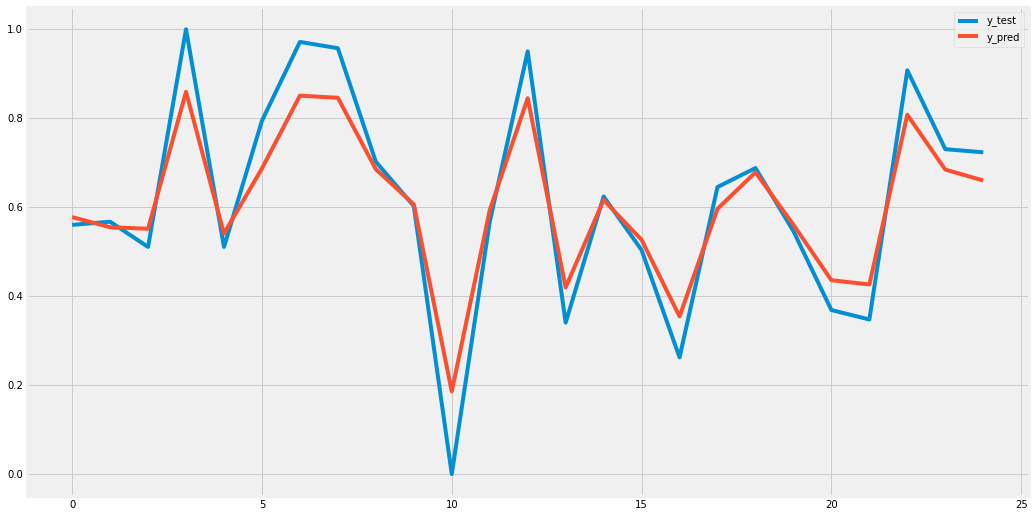

In [ ]:
plt.figure(figsize=(16,9))
df_resultADRO.y_test.plot()
df_resultADRO.y_pred.plot()
plt.legend()

In [ ]:
df_resultADRO.max()

y_pred    0.859401
y_test    1.000000
dtype: float64

In [ ]:
actual = df_resultADRO['y_test']
predicted =df_resultADRO['y_pred']

mse = mean_squared_error(df_resultADRO.y_pred, df_resultADRO.y_test)

rmse = math.sqrt(mse)
print(rmse)

0.07816788660267654


### ANTM

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_ANTM.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_ANTM = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_ANTM

,Open,High,Low,Close,Adj Close,Volume
0,0.937811,0.936061,0.960733,0.948320,0.948320,0.157009
1,0.937811,0.948849,0.986911,0.987080,0.987080,0.167442
2,0.950249,0.948849,0.986911,0.974160,0.974160,0.096401
3,0.950249,0.948849,0.986911,1.000000,1.000000,0.096248
4,0.950249,0.961637,1.000000,0.987080,0.987080,0.092751
...,...,...,...,...,...,...
116,0.888060,0.872123,0.908377,0.870801,0.879022,0.458542
117,0.863184,0.923274,0.921466,0.974160,0.982861,0.673540
118,0.950249,1.000000,0.986911,0.961240,0.969881,0.637658
119,0.925373,0.961637,0.973822,0.987080,0.995841,0.272182


In [ ]:
X=df_ANTM[['Open','High','Low']].values
y=df_ANTM['Close'].values

**X** = `Variable Dependent`
**y** = `Variable Independent`

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

Make `Data Training` **80%** and `Data Testing` **20%**

In [ ]:
tf.random.set_seed(42)
modelANTM = keras.Sequential(
    [
        layers.Dense(6,activation='relu'),
        layers.Dense(7),
        layers.Dense(8),
        layers.Dense(1)
    ]
)

Make `Fully-Connected Layer` With `4 Layer`.

In [ ]:
modelANTM.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelANTM.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.3063 - mse: 0.3063
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2112 - mse: 0.2112
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.1335
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0762 - mse: 0.0762
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0190 - mse: 0.0190
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0126 - mse: 0.0126
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0102 - mse: 0.0102
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0099


In [ ]:
modelANTM.evaluate(X_test,y_test)

1/1 [==============================] - 0s 151ms/step - loss: 0.0082 - mse: 0.0082


[0.008190716616809368, 0.008190716616809368]

In [ ]:
y_pred=modelANTM.predict(X_test).flatten()

In [ ]:
df_resultANTM=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultANTM

,y_pred,y_test
0,0.544591,0.483204
1,0.661326,0.664083
2,0.641115,0.651163
3,0.822970,0.857881
4,0.653103,0.638243
5,0.682237,0.728682
6,0.833757,0.948320
7,0.773147,0.857881
8,0.608753,0.534884
9,0.693761,0.741602


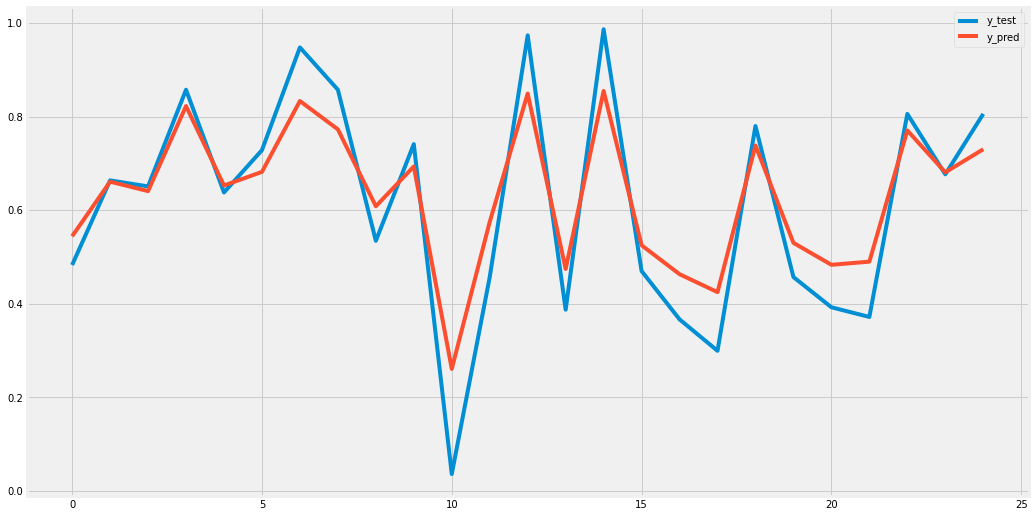

In [ ]:
plt.figure(figsize=(16,9))
df_resultANTM.y_test.plot()
df_resultANTM.y_pred.plot()
plt.legend()

In [ ]:
df_resultANTM.max()

y_pred    0.855368
y_test    0.987080
dtype: float64

In [ ]:
actual = df_resultANTM['y_test']
predicted =df_resultANTM['y_pred']

mse = mean_squared_error(actual, predicted)

rmseANTM = math.sqrt(mse)
print(rmseANTM)

0.0905025815263019


### BRPT

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_BRPT.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_BRPT = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_BRPT

,Open,High,Low,Close,Adj Close,Volume
0,0.840637,0.814070,0.851890,0.823944,0.823944,0.092212
1,0.820717,0.798995,0.851890,0.818913,0.818913,0.117637
2,0.820717,0.793970,0.816139,0.828974,0.828974,0.136752
3,0.820717,0.793970,0.831461,0.788732,0.788732,0.102509
4,0.780876,0.783920,0.826353,0.813883,0.813883,0.148496
...,...,...,...,...,...,...
116,0.731076,0.703518,0.754852,0.723340,0.723340,0.070478
117,0.691235,0.663317,0.683350,0.642857,0.642857,0.213737
118,0.626494,0.597990,0.606742,0.567404,0.567404,0.081188
119,0.551793,0.542714,0.535240,0.496982,0.496982,0.144154


In [ ]:
X=df_BRPT[['Open','High','Low']].values
y=df_BRPT['Close'].values

**X** = `Variable Dependent`
**y** = `Variable Independent`

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

Make `Data Training` **80%** and `Data Testing` **20%**

In [ ]:
tf.random.set_seed(42)
modelBRPT = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

Make `Fully-Connected Layer` With `4 Layer`.

In [ ]:
modelBRPT.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelBRPT.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1904 - mse: 0.1904
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.1276
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0787 - mse: 0.0787
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0453 - mse: 0.0453
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.0078
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0055 - mse: 0.0055


In [ ]:
modelBRPT.evaluate(X_test,y_test)

1/1 [==============================] - 0s 135ms/step - loss: 0.0056 - mse: 0.0056


[0.005601959303021431, 0.005601959303021431]

In [ ]:
y_pred=modelBRPT.predict(X_test).flatten()

In [ ]:
df_resultBRPT=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultBRPT

,y_pred,y_test
0,0.531559,0.451710
1,0.709821,0.738431
2,0.699392,0.713280
3,0.744929,0.773642
4,0.686582,0.718310
5,0.592406,0.567404
6,0.747123,0.803823
7,0.708528,0.728370
8,0.589906,0.532193
9,0.740494,0.758551


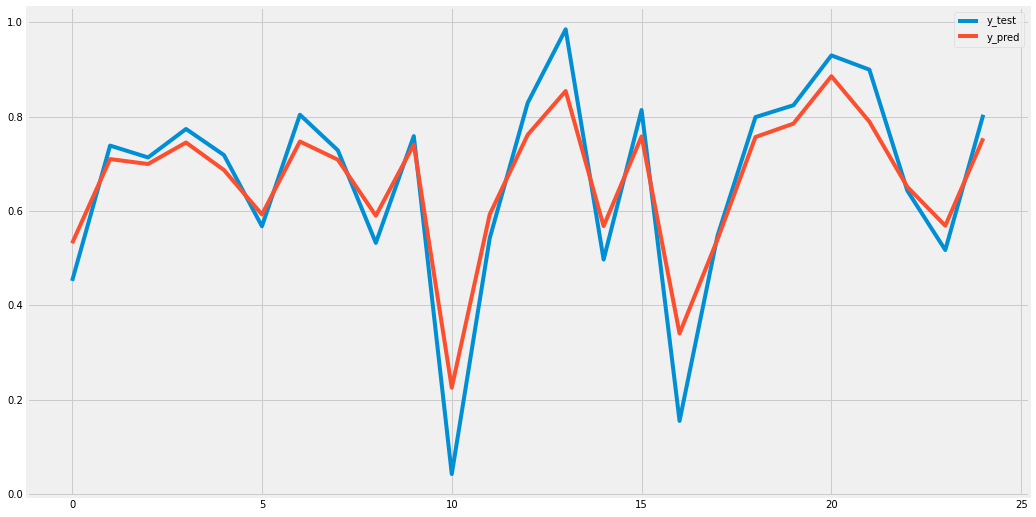

In [ ]:
plt.figure(figsize=(16,9))
df_resultBRPT.y_test.plot()
df_resultBRPT.y_pred.plot()
plt.legend()

In [ ]:
df_resultBRPT.max()

y_pred    0.885457
y_test    0.984909
dtype: float64

In [ ]:
actual = df_resultBRPT['y_test']
predicted =df_resultBRPT['y_pred']

mse = mean_squared_error(actual, predicted)

rmseBRPT = math.sqrt(mse)
print(rmseBRPT)

0.07484623329699568


### INCO

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_INCO.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_INCO = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_INCO

,Open,High,Low,Close,Adj Close,Volume
0,0.835351,0.841860,0.845411,0.891626,0.891626,0.157155
1,0.878935,0.879070,0.917874,0.916256,0.916256,0.211822
2,0.903148,0.869767,0.922705,0.916256,0.916256,0.084752
3,0.927361,0.888372,0.937198,0.921182,0.921182,0.084727
4,0.907990,0.874419,0.937198,0.921182,0.921182,0.078332
...,...,...,...,...,...,...
116,0.903148,0.916279,0.932367,0.906404,0.906404,0.769588
117,0.912833,0.953488,0.951691,1.000000,1.000000,0.533935
118,1.000000,1.000000,0.985507,0.980296,0.980296,0.524361
119,0.961259,0.939535,0.975845,0.965517,0.965517,0.322458


In [ ]:
X=df_INCO[['Open','High','Low']].values
y=df_INCO['Close'].values

**X** = `Variable Dependent`
**y** = `Variable Independent`

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

Make `Data Training` **80%** and `Data Testing` **20%**

In [ ]:
tf.random.set_seed(42)
modelINCO = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

Make `Fully-Connected Layer` With `4 Layer`.

In [ ]:
modelINCO.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelINCO.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1986 - mse: 0.1986
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1393 - mse: 0.1393
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0891 - mse: 0.0891
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0538 - mse: 0.0538
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0167 - mse: 0.0167
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0108 - mse: 0.0108
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 0.0081
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071


In [ ]:
modelINCO.evaluate(X_test,y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.0068 - mse: 0.0068


[0.0068099177442491055, 0.0068099177442491055]

In [ ]:
y_pred=modelINCO.predict(X_test).flatten()

In [ ]:
df_resultINCO=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultINCO

,y_pred,y_test
0,0.508502,0.458128
1,0.683076,0.679803
2,0.671238,0.669951
3,0.817839,0.857143
4,0.670492,0.669951
5,0.639977,0.625616
6,0.824748,0.906404
7,0.768696,0.812808
8,0.574554,0.428571
9,0.737730,0.788177


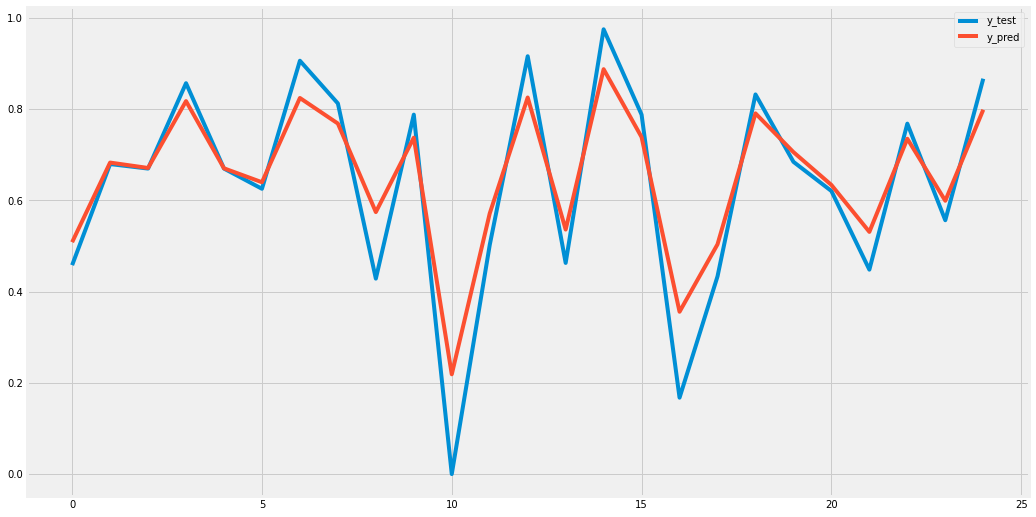

In [ ]:
plt.figure(figsize=(16,9))
df_resultINCO.y_test.plot()
df_resultINCO.y_pred.plot()
plt.legend()

In [ ]:
df_resultINCO.max()

y_pred    0.887889
y_test    0.975369
dtype: float64

In [ ]:
actual = df_resultINCO['y_test']
predicted =df_resultINCO['y_pred']

mse = mean_squared_error(actual, predicted)

rmseINCO = math.sqrt(mse)
print(rmseINCO)

0.08252222946262726


### ITMG

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_ITMG.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_ITMG = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_ITMG

,Open,High,Low,Close,Adj Close,Volume
0,0.782609,0.810,0.794258,0.763033,0.763033,0.161847
1,0.792271,0.800,0.846890,0.781991,0.781991,0.072830
2,0.845411,0.840,0.904306,0.838863,0.838862,0.149332
3,0.917874,0.885,0.923445,0.853081,0.853081,0.098791
4,0.874396,0.840,0.894737,0.834123,0.834123,0.060856
...,...,...,...,...,...,...
116,0.367150,0.310,0.382775,0.312796,0.412059,0.195440
117,0.328502,0.330,0.387560,0.374408,0.477873,0.338719
118,0.396135,0.400,0.454545,0.383886,0.487999,0.319464
119,0.410628,0.355,0.416268,0.355450,0.457622,0.147424


In [ ]:
X=df_ITMG[['Open','High','Low']].values
y=df_ITMG['Close'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
tf.random.set_seed(42)
modelITMG = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

In [ ]:
modelITMG.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelITMG.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0986 - mse: 0.0986
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0669 - mse: 0.0669
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0268 - mse: 0.0268
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 0.0087
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0083 - mse: 0.0083


In [ ]:
modelITMG.evaluate(X_test,y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.0098 - mse: 0.0098


[0.009763588197529316, 0.009763588197529316]

In [ ]:
y_pred=modelITMG.predict(X_test).flatten()

In [ ]:
df_resultITMG=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultITMG

,y_pred,y_test
0,0.371625,0.327014
1,0.331101,0.260664
2,0.318541,0.236967
3,0.666786,0.781991
4,0.306119,0.227488
5,0.778556,0.933649
6,0.674159,0.767773
7,0.690111,0.848341
8,0.498578,0.421801
9,0.383753,0.341232


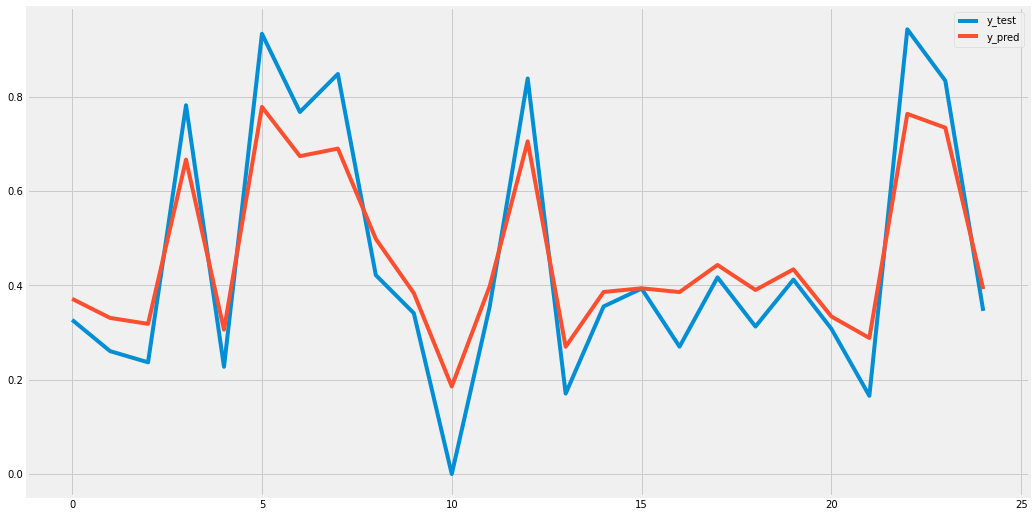

In [ ]:
plt.figure(figsize=(16,9))
df_resultITMG.y_test.plot()
df_resultITMG.y_pred.plot()
plt.legend()

In [ ]:
df_resultITMG.max()

y_pred    0.778556
y_test    0.943128
dtype: float64

In [ ]:
actual = df_resultITMG['y_test']
predicted =df_resultITMG['y_pred']

mse = mean_squared_error(actual, predicted)

rmseITMG = math.sqrt(mse)
print(rmseITMG)
print(mse)

0.09881086957534356
tf.Tensor(0.009763587946235556, shape=(), dtype=float64)


### PGAS

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_PGAS.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_PGAS = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_PGAS

,Open,High,Low,Close,Adj Close,Volume
0,0.981651,1.000000,1.000000,1.000000,1.000000,0.051889
1,1.000000,0.985646,0.855140,0.835616,0.835616,0.292274
2,0.844037,0.866029,0.785047,0.794521,0.794521,0.373022
3,0.816514,0.822967,0.817757,0.835616,0.835616,0.204216
4,0.834862,0.837321,0.836449,0.853881,0.853881,0.188134
...,...,...,...,...,...,...
116,0.587156,0.555024,0.565421,0.561644,0.677394,0.187624
117,0.550459,0.545455,0.565421,0.570776,0.687475,0.107174
118,0.573394,0.540670,0.565421,0.561644,0.677394,0.087064
119,0.559633,0.545455,0.560748,0.570776,0.687475,0.168223


In [ ]:
X=df_PGAS[['Open','High','Low']].values
y=df_PGAS['Close'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
tf.random.set_seed(42)
modelPGAS = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

In [ ]:
modelPGAS.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelPGAS.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0974 - mse: 0.0974
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0674 - mse: 0.0674
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0445 - mse: 0.0445
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0178 - mse: 0.0178
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0122 - mse: 0.0122
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 0.0080
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069


In [ ]:
modelPGAS.evaluate(X_test,y_test)

1/1 [==============================] - 0s 341ms/step - loss: 0.0067 - mse: 0.0067


[0.0067093451507389545, 0.0067093451507389545]

In [ ]:
y_pred=modelPGAS.predict(X_test).flatten()

In [ ]:
df_resultPGAS=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultPGAS

,y_pred,y_test
0,0.288184,0.205479
1,0.472547,0.479452
2,0.456099,0.442922
3,0.694721,0.821918
4,0.473639,0.497717
5,0.625502,0.748858
6,0.708846,0.812785
7,0.698944,0.812785
8,0.345326,0.283105
9,0.469893,0.474886


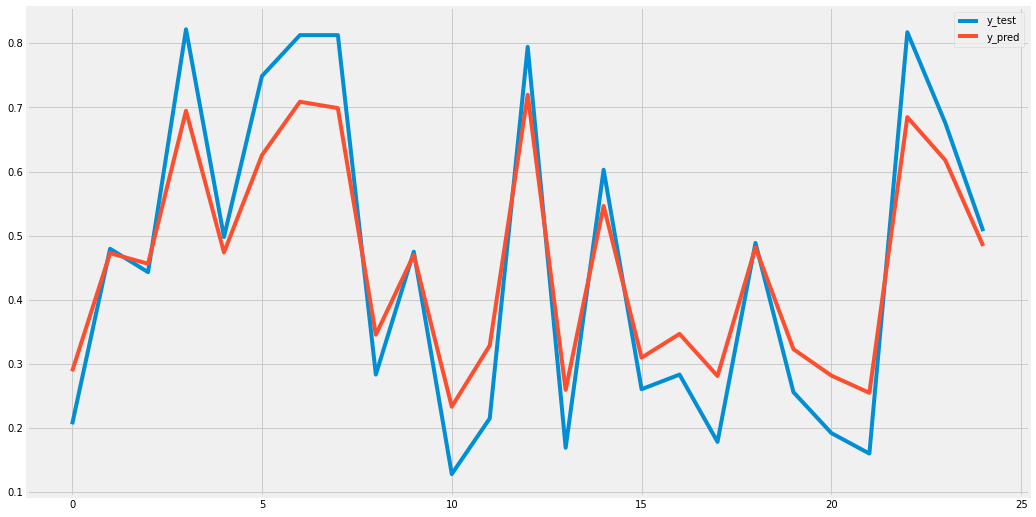

In [ ]:
plt.figure(figsize=(16,9))
df_resultPGAS.y_test.plot()
df_resultPGAS.y_pred.plot()
plt.legend()

In [ ]:
df_resultPGAS.max()

y_pred    0.719767
y_test    0.821918
dtype: float64

In [ ]:
actual = df_resultPGAS['y_test']
predicted =df_resultPGAS['y_pred']

mse = mean_squared_error(actual, predicted)

rmsePGAS = math.sqrt(mse)
print(rmsePGAS)

0.08191059086848611


### PTBA

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_PTBA.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_PTBA = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_PTBA

,Open,High,Low,Close,Adj Close,Volume
0,0.665072,0.663158,0.720930,0.681592,0.597982,0.096500
1,0.674641,0.684211,0.730233,0.741294,0.650360,0.057851
2,0.760766,0.789474,0.832558,0.830846,0.728928,0.089122
3,0.837321,0.810526,0.832558,0.800995,0.702738,0.041971
4,0.751196,0.789474,0.813953,0.830846,0.728928,0.032205
...,...,...,...,...,...,...
116,0.588517,0.557895,0.637209,0.582090,0.788494,0.086973
117,0.569378,0.547368,0.637209,0.592040,0.798565,0.063713
118,0.578947,0.547368,0.618605,0.592040,0.798565,0.084659
119,0.569378,0.526316,0.618605,0.582090,0.788494,0.040369


In [ ]:
X=df_PTBA[['Open','High','Low']].values
y=df_PTBA['Close'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
tf.random.set_seed(42)
modelPTBA = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

In [ ]:
modelPTBA.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelPTBA.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1768 - mse: 0.1768
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0720 - mse: 0.0720
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0403
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0116 - mse: 0.0116
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0058 - mse: 0.0058
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0057 - mse: 0.0057


In [ ]:
modelPTBA.evaluate(X_test,y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.0078 - mse: 0.0078


[0.00778038427233696, 0.00778038427233696]

In [ ]:
y_pred=modelPTBA.predict(X_test).flatten()

In [ ]:
df_resultPTBA=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultPTBA

,y_pred,y_test
0,0.535720,0.512438
1,0.624590,0.631841
2,0.599572,0.572139
3,0.730837,0.791045
4,0.573269,0.542289
5,0.842151,0.980100
6,0.758782,0.791045
7,0.768364,0.850746
8,0.685437,0.611940
9,0.858607,0.980100


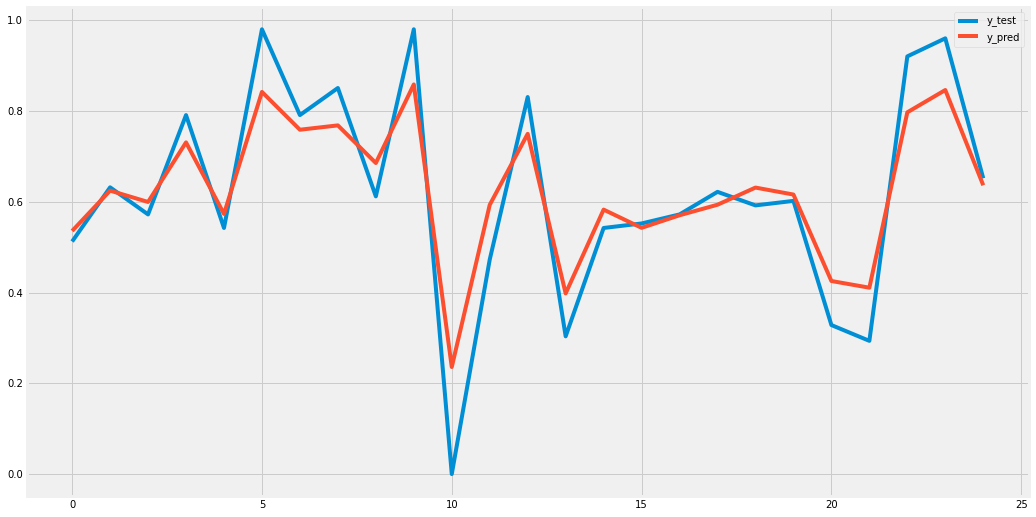

In [ ]:
plt.figure(figsize=(16,9))
df_resultPTBA.y_test.plot()
df_resultPTBA.y_pred.plot()
plt.legend()

In [ ]:
df_resultPTBA.max()

y_pred    0.858607
y_test    0.980100
dtype: float64

In [ ]:
actual = df_resultPTBA['y_test']
predicted =df_resultPTBA['y_pred']

mse = mean_squared_error(actual, predicted)

rmsePTBA = math.sqrt(mse)
print(rmsePTBA)

0.08820648754659181


### LQ45

In [ ]:
#Import MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 
#Choose numeric variabels
df_2=df_LQ45.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_LQ45 = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
#show dataset after normalize
df_LQ45

,Open,High,Low,Close,Adj Close,Volume
0,0.935318,0.947657,0.940226,0.942122,0.942122,0.046518
1,0.969508,0.962184,0.967421,0.970354,0.970354,0.087401
2,0.974334,0.978224,0.975253,0.998927,0.998927,0.058613
3,1.000000,1.000000,0.996598,0.996855,0.996855,0.040301
4,0.983769,0.986042,1.000000,1.000000,1.000000,0.042745
...,...,...,...,...,...,...
116,0.575558,0.519639,0.550962,0.546871,0.546871,0.172536
117,0.538559,0.501596,0.549249,0.569349,0.569349,0.138923
118,0.560696,0.519801,0.564571,0.567691,0.567691,0.135620
119,0.559064,0.501650,0.556641,0.557208,0.557208,0.162627


In [ ]:
X=df_LQ45[['Open','High','Low']].values
y=df_LQ45['Close'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
tf.random.set_seed(42)
modelLQ45 = keras.Sequential(
    [
        layers.Dense(5,activation='relu'),
        layers.Dense(3),
        layers.Dense(5),
        layers.Dense(1)
    ]
)

In [ ]:
modelLQ45.compile(optimizer='Adamax',loss='mse',metrics=['mse'])

In [ ]:
modelLQ45.fit(X_train,y_train,epochs=10,steps_per_epoch=12)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.1321
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0929 - mse: 0.0929
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0621 - mse: 0.0621
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 0.0076
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062


In [ ]:
modelLQ45.evaluate(X_test,y_test)

1/1 [==============================] - 0s 162ms/step - loss: 0.0075 - mse: 0.0075


[0.0075344848446547985, 0.0075344848446547985]

In [ ]:
y_pred=modelLQ45.predict(X_test).flatten()

In [ ]:
df_resultLQ45=pd.DataFrame({'y_pred':y_pred.tolist(),
                        'y_test':y_test})
df_resultLQ45

,y_pred,y_test
0,0.375278,0.308774
1,0.493040,0.499988
2,0.495280,0.471073
3,0.824623,0.944438
4,0.479372,0.470025
5,0.741260,0.867153
6,0.833136,0.960943
7,0.812908,0.944340
8,0.474203,0.397177
9,0.512221,0.508643


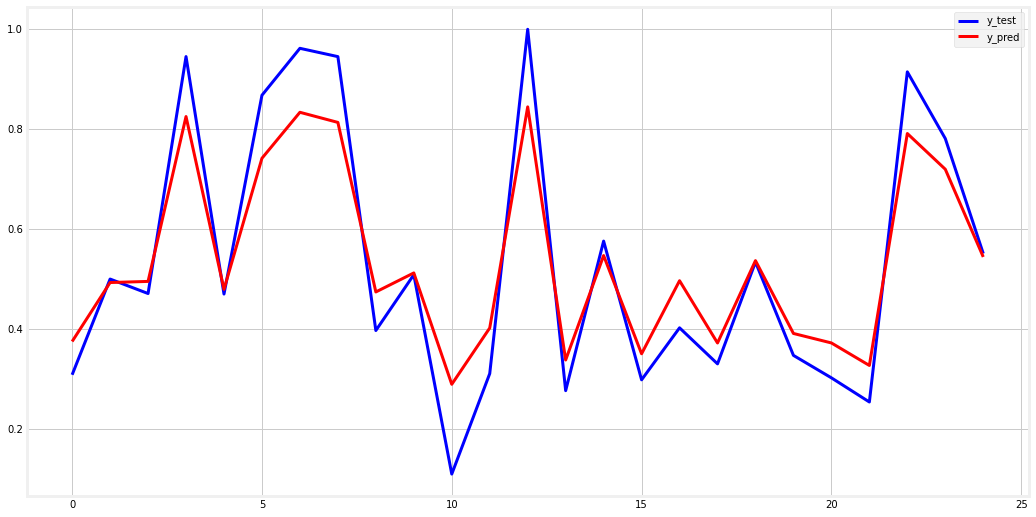

In [ ]:
fig=plt.figure(figsize=(16,9))
ax = plt.gca()
df_resultLQ45.y_test.plot(linewidth=3, color="b" )
df_resultLQ45.y_pred.plot(linewidth=3, color="r")
ax.set_facecolor('xkcd:white')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1') 
plt.legend()

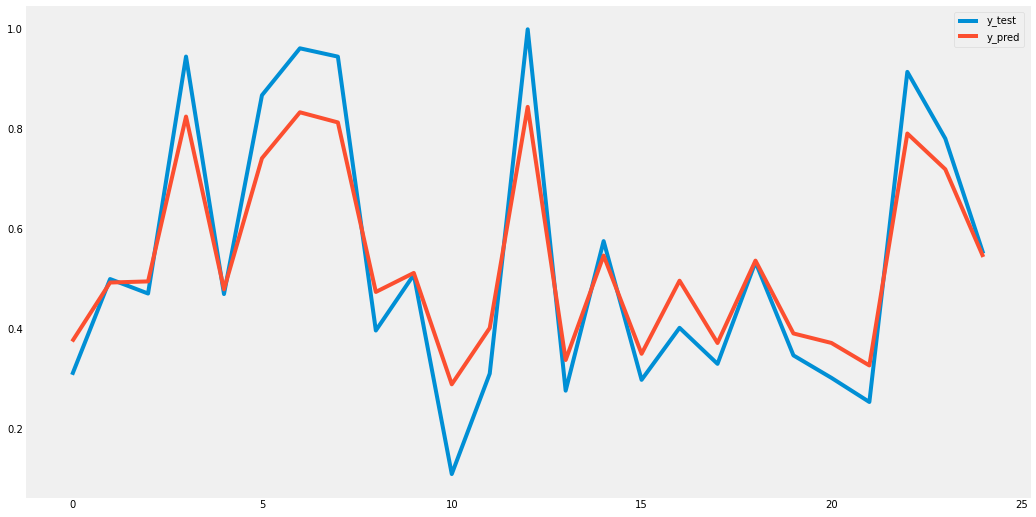

In [ ]:
plt.figure(figsize=(16,9))
df_resultLQ45.y_test.plot(linewidth=4)
df_resultLQ45.y_pred.plot(linewidth=4)
plt.grid()
plt.legend()

In [ ]:
df_resultLQ45.max()

y_pred    0.843961
y_test    0.998927
dtype: float64

In [ ]:
actual = df_resultLQ45['y_test']
predicted =df_resultLQ45['y_pred']

mse = mean_squared_error(actual, predicted)

rmseLQ45 = math.sqrt(mse)
print(rmseLQ45)

0.08680141264453967


In [ ]:
pip install tabulate

In [ ]:

from tabulate import tabulate

In [ ]:
table = [['Stock', 'RMSE Result'], ['ADRO', rmse], ['ANTM', rmseANTM], ['BRPT', rmseBRPT],['INCO',rmseINCO],['ITMG',rmseITMG],['PGAS',rmsePGAS],['PTBA',rmsePTBA],['LQ45',rmseLQ45]]


In [ ]:
print(tabulate(table,headers='firstrow'))

Stock      RMSE Result
-------  -------------
ADRO         0.0781679
ANTM         0.0905026
BRPT         0.0748462
INCO         0.0825222
ITMG         0.0988109
PGAS         0.0819106
PTBA         0.0882065
LQ45         0.0868014
